# Úkol č. 2 - Využití shlukování pro počítání objektů na obrázku
  * **Deadline je do 22. listopadu 23:59.** Pokud odevzdáte úkol do 29. listopadu 23:59 budete penalizování -4 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte vhodným způsobem vybírat příznaky pro shlukovací algoritmy. Někdy je vhodné použít barevnou reprezentaci obrázku (RGB nebo spíše HSV), jindy je lepší použít souřadnice pixelů v obrázku.
  * Samozřejmě existují mnohem pokročilejší nástroje pro segmentaci objektů na obrázku, které jsou dostupné v různých knihovnách, ale tady nám jde o to vyzkoušet si na jednoduché úloze aplikaci základních shlukovacích metod.
  * Vaším cílem je využít algoritmus **KMeans a hierarchické aglomerativní shlukování** k tomu, abyste vytvořili jednoduchý kód, který, když na vstupu dostane obrázek z dané sady, dokáže vrátit **počet objektů**, které se na obrázku vyskytují.
  
  
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat
Budeme pracovat s obrázky, které jsou uložené v podadresáři `data` a originálně pocházejí z datasetu [CLEVR](https://cs.stanford.edu/people/jcjohns/clevr/). Na těchto obrázcích jsou různě rozmístěné barevné objekty na šedém pozadí.

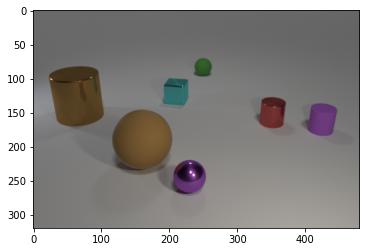

In [1]:
# Ukázka jednoho z obrázků
from PIL import Image
from matplotlib import pyplot as plt

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **12 bodů**:
- Vezměte libovolný obrázek z datasetu (pro začátek doporučuji nějaký, kde jsou objekty spíše dál od sebe), načtěte ho a zobrazte.
- Převeďte ho do `numpy` array, která pak přeskupte (reshape) do pole bodů v prostoru RGB, tj. do tvaru `(počet bodů, 3)`.
- V tomto barevném příznakovém prostoru zkuste provést shlukování (vyberte vhodný algoritmus na základě velikosti a charakteru dat) a diskutujte výsledky (které asi nebudou nic moc).
- Zkuste příznaky obohatit o prostorové souřadnice (k tomu využijte numpy funkci `meshgrid` s parametrem `indexing='ij'` a také funkci `concatenate`, která umožní připojení k obrázkovým datům). Jako výstup tohoto kroku byste měli mít pole ve tvaru `(počet bodů, 5)`, kde první 3 příznaky odpovídají barvám a zbylé dva souřadnicím každého z pixelů.
- V tomto obohaceném příznakovém prostoru znovu zkuste shlukování a diskutujte výsledky (které asi opět nebudou nic moc).
- Nyní to celé zkusíme znovu, ale po načtení a zobrazení si obrázek převedeme do barevné reprezentace HSV. V první fázi si tedy obrázek načtěte do HSV reprezentace (balíček PIL na to má metodu `convert("HSV")`).
- Dále v tomto novém barevném prostoru proveďte shlukování pomocí KMeans a vhodným výběrem shluků (koukejte na saturation příznak) si odseparujte barevné objekty od pozadí (bez jejich odlišení - to provedeme později).
Dostanete něco takového: 

![title](./mask_of_objects.png)
- Když už máme objekty odseparované od pozadí (použijte logickou masku pro filtrování array, kterou si vytvoříte v předchozím kroku), budeme dále pracovat pouze s odpovídajícími pixely (pozadí už ne bereme). 
- Nyní si pro tyto pixely vytvoříme reprezentaci pomocí jejich souřadnic v původním obrázku (použijeme výše zmíněný `meshgrid` a také logickou masku).
- V tomto souřadnicovém prostoru proveďte vhodné shlukování, aby došlo ke správnému odseparování předmětů.
Finální výstup by měl vypadat nějak takto:

![title](./final_output.png)
- Diskutujte úskalí navrženého postupu a jeho univerzálnost pro počítání objektů na libovolném pozadí resp. částečně se překrývajících objektů. 

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 16 bodů):
- (až +4 body) Polaďte algoritmus tak, aby pro téměř libovolný vstup z dané datové sady vypsal správný počet objektů a odseparoval je tak, jak je zobrazeno výše. K tomu je třeba správně zvolit shlukovací algoritmus v posledním kroku a také kritérium pro automatickou detekci správného počtu shluků. Diskutujte Váš postup.
- (až +4 body) Poslední shlukování pro odseparování předmětů jsme dělali pouze v souřadnicovém prostoru. Zkuste experimentovat s reprezentací v prostoru, kde jsou zkombinovány jak barevné tak i souřadnicové příznaky (s různými váhami mezi oběma skupinami). Cílem je opět automatická detekce počtu objektů pro libovolný vstup z dané datové sady. Diskutujte Váš postup a případné výhody tohoto přístupu, ve kterém se kombinují oba typy příznaků.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# 1. část 
## Načtení a zpracování v RGB formátu

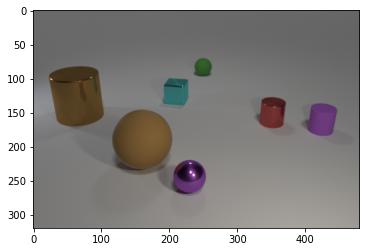

In [3]:
# Ukázka jednoho z obrázků
from PIL import Image

# with Image.open("data/CLEVR_test_000941.png").convert('RGB') as image:

with Image.open("data/CLEVR_test_001109.png").convert('RGB') as image:
    plt.imshow(image)

In [4]:
width, height = image.size
print(width, height)
pix = np.array(image)/255.0
reshaped = np.reshape(pix, (-1, 3))
print('Shape of the array:', pix.shape)
print('Shape of the reshaped array:', reshaped.shape)

480 320
Shape of the array: (320, 480, 3)
Shape of the reshaped array: (153600, 3)


## Použiji silhouette pro nalezení optimálního k

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list (range(2,9))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 1)
    preds = clusterer.fit_predict(reshaped)
    centers = clusterer.cluster_centers_

    score = silhouette_score(reshaped, preds, sample_size=5000)
    print("For n_clusters = {} silhouette_score is {})".format(n_clusters, score))

For n_clusters = 2 silhouette_score is 0.6769722383404165)
For n_clusters = 3 silhouette_score is 0.5315646752245072)
For n_clusters = 4 silhouette_score is 0.5853921601184358)
For n_clusters = 5 silhouette_score is 0.5605993709434871)
For n_clusters = 6 silhouette_score is 0.5941019018868609)
For n_clusters = 7 silhouette_score is 0.6168870129490921)
For n_clusters = 8 silhouette_score is 0.5658806834449841)


* Optimální k vyšlo 2, což je daleko od pravdy a je to dost špatný. Očekáváme k=7

[0 0 0 ... 0 0 0]
[[0.48387128 0.47844684 0.47545631]
 [0.33928331 0.2535634  0.1967313 ]]


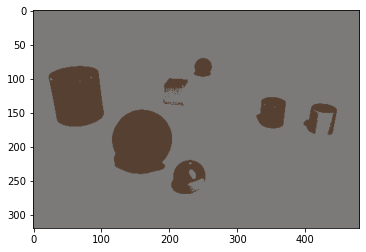

In [6]:
k = 2
kmeans = KMeans(n_clusters = 2, random_state = 1).fit(reshaped)

# výsledné shluky
print(kmeans.labels_)
# a jejich středy
print(kmeans.cluster_centers_)

restored = np.take(kmeans.cluster_centers_, kmeans.labels_, axis=0)
plt.imshow(restored.reshape((height, width, 3)))
plt.show()

# 2. část
## Obohacení o souřadnicové příznaky

In [7]:
# Zkuste příznaky obohatit o prostorové souřadnice
# (k tomu využijte numpy funkci meshgrid s parametrem indexing='ij' 
# a také funkci concatenate, která umožní připojení k obrázkovým datům). 

# Jako výstup tohoto kroku byste měli mít pole ve tvaru (počet bodů, 5),
# kde první 3 příznaky odpovídají barvám a zbylé dva souřadnicím každého z pixelů.

In [8]:
w_range = np.array(range(0,width))
h_range = np.array(range(0,height))

In [9]:
w, h = np.meshgrid(w_range, h_range)

In [10]:
ww = np.reshape(w, (-1,1))
hh = np.reshape(h, (-1,1))

In [11]:
rgb_ij = np.concatenate((np.uint8(reshaped*255), ww, hh), axis=1)

In [12]:
from sklearn.metrics import silhouette_score

range_n_clusters = list (range(2,9))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 1)
    preds = clusterer.fit_predict(rgb_ij)
    centers = clusterer.cluster_centers_

    score = silhouette_score(rgb_ij, preds, sample_size=5000)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41626600437305933)
For n_clusters = 3, silhouette score is 0.3819503221528724)
For n_clusters = 4, silhouette score is 0.35691292050751683)
For n_clusters = 5, silhouette score is 0.36565938043841145)
For n_clusters = 6, silhouette score is 0.3589893438037246)
For n_clusters = 7, silhouette score is 0.3714781327090001)
For n_clusters = 8, silhouette score is 0.3518404017984689)


* Optimální k vyšlo 2, což je daleko od pravdy a je to dost špatný. Očekáváme k=7. A navíc s horší precizností, než v nesouřadnicovém případě (u silhouette čím blíže k 1.0 je score, tim lépe)

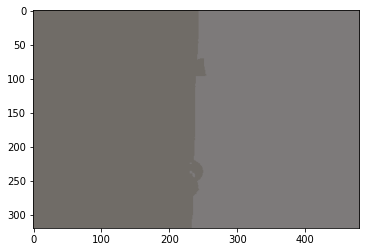

In [13]:
# Zkusme 2 shluky
k = 2

kmeans = KMeans(n_clusters = k, random_state = 1).fit(rgb_ij)
lab = kmeans.labels_
cen = np.uint8(kmeans.cluster_centers_)

restored = np.take(cen, lab, axis=0)
#restored = restored[:,:3]
#res = restored.reshape(pix.shape)
#print(restored.shape)
restored = restored.reshape((height, width, 5))
res = restored[:,:,:3]

# show the image
plt.imshow(res)
plt.show()

# 3. část
## Nyní to celé zkusíme znovu, ale po načtení a zobrazení si obrázek převedeme do barevné reprezentace HSV. V první fázi si tedy obrázek načtěte do HSV reprezentace (balíček PIL na to má metodu convert("HSV")).

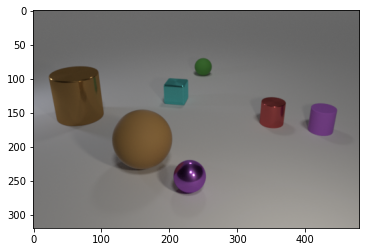

In [14]:
with Image.open("data/CLEVR_test_001109.png").convert('HSV') as img:
    plt.imshow(img)

In [15]:
width, height = img.size

* Dále v tomto novém barevném prostoru proveďte shlukování pomocí KMeans a vhodným výběrem shluků (koukejte na saturation příznak) si odseparujte barevné objekty od pozadí (bez jejich odlišení - to provedeme později).

In [16]:
img_data = np.array(img)
print(img_data.shape)

img_data = np.reshape(img_data, (-1,3))
print(img_data.shape)

(320, 480, 3)
(153600, 3)


In [17]:
range_n_clusters = list (range(2,9))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 1)
    preds = clusterer.fit_predict(img_data[:, 1:2])
    centers = clusterer.cluster_centers_

    score = silhouette_score(img_data, preds, sample_size=5000)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6629454327035331)
For n_clusters = 3, silhouette score is 0.23128734982626015)
For n_clusters = 4, silhouette score is 0.22785376978355806)
For n_clusters = 5, silhouette score is 0.2015279970150449)
For n_clusters = 6, silhouette score is 0.2102273663230688)
For n_clusters = 7, silhouette score is 0.2210918037976432)
For n_clusters = 8, silhouette score is 0.10304446563033966)


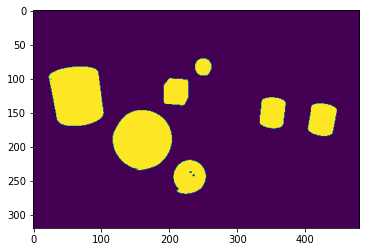

In [18]:
k=2
kmeans = KMeans(n_clusters=k, random_state=1).fit(img_data[:, 1:2])

restored = np.take(np.uint8(kmeans.cluster_centers_), kmeans.labels_, axis=0)
#print(restored.shape)
#print(restored)

cen = kmeans.cluster_centers_
lab = kmeans.labels_

# show the image

plt.imshow(restored.reshape((320, 480,1)))
plt.show()

In [19]:
xx, yy = np.meshgrid(range(height), range(width), indexing='ij')
grid = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1, 1))), axis=1)

In [20]:
object_pixels = grid[lab != 0]

In [21]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

# spočteme tzv. matici propojení
Z = linkage(object_pixels, method="single", metric="euclidean")

max_d = 8
# https://datascience.stackexchange.com/questions/84594/what-is-criterion-in-flcuster-of-scipy-package
clusters = fcluster(Z, max_d, criterion="maxclust")

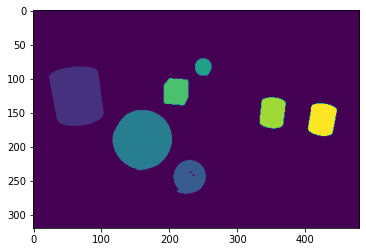

Počet nalezenych objektů: 7


In [22]:
result = np.zeros(height * width)
result[lab != 0] = clusters
plt.imshow(result.reshape(320, 480,1))
plt.show()
print("Počet nalezenych objektů:",np.unique(clusters).size)

# Finální část
## To samé, ale pro všechny obrázky.

In [23]:
# funkce vrátí list
# s cestami ke všem
# obrázkovým souborům

import os

def get_paths():
    paths = []

    for filename in os.listdir("data/"):
        img_path = os.path.join("data/", filename)
        paths.append(img_path)
    paths.sort()

    return paths

In [24]:
# funkce určená k výpočtu toho
# kolik clusterů jsou reálně objekty
# nikoliv šum, který má sebeméně pixelů 
# ale tváří se jako objekt

def count_objects(clusters):
    # předpokládejme, že pod nonobject_amount_of_pixels
    # pixelů se žádný objekt nedostane, pouze šum
    nonobject_amount_of_pixels = 111

    total_objects = 0

    for obj in np.unique(clusters): 
        if (clusters[clusters == obj].size < nonobject_amount_of_pixels):
            continue
        print(obj)
        total_objects += 1

        #print(total_objects)
    return total_objects

In [25]:
# slovník, díky kterému víme, 
# kolik máme očekávat 
# na kterém obrázku
# objektů

dict_img_objAmount = {
 'data/CLEVR_test_000014.png' :   5   ,
 'data/CLEVR_test_000214.png' :   3   ,
 'data/CLEVR_test_000377.png' :   3   ,
 'data/CLEVR_test_000388.png' :   4   ,
 'data/CLEVR_test_000389.png' :   3   ,
 'data/CLEVR_test_000411.png' :   3   ,
 'data/CLEVR_test_000439.png' :   3   ,
 'data/CLEVR_test_000558.png' :   5   ,
 'data/CLEVR_test_000559.png' :   3   ,
 'data/CLEVR_test_000565.png' :   4   ,
 'data/CLEVR_test_000606.png' :   6   ,
 'data/CLEVR_test_000758.png' :   4   ,
 'data/CLEVR_test_000766.png' :   5   ,
 'data/CLEVR_test_000770.png' :   3   ,
 'data/CLEVR_test_000821.png' :   4   ,
 'data/CLEVR_test_000835.png' :   5   ,
 'data/CLEVR_test_000837.png' :   4   ,
 'data/CLEVR_test_000941.png' :   3   ,
 'data/CLEVR_test_000955.png' :   3   ,
 'data/CLEVR_test_000994.png' :   3   ,
 'data/CLEVR_test_000997.png' :   3   ,
 'data/CLEVR_test_001109.png' :   7   ,
 'data/CLEVR_test_001256.png' :   6   ,
 'data/CLEVR_test_001294.png' :   3   ,
 'data/CLEVR_test_001525.png' :   3   ,
 'data/CLEVR_test_001530.png' :   3   ,
 'data/CLEVR_test_001652.png' :   3   ,
 'data/CLEVR_test_001685.png' :   3   ,
 'data/CLEVR_test_001687.png' :   4   ,
 'data/CLEVR_test_001690.png' :   5
}

Image:  data/CLEVR_test_000014.png


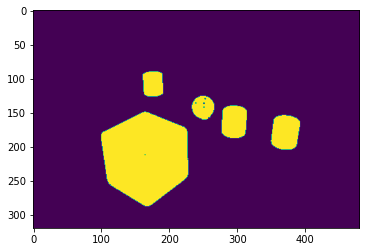

1
2
3
4
5
Počet nalezených objektů: 5


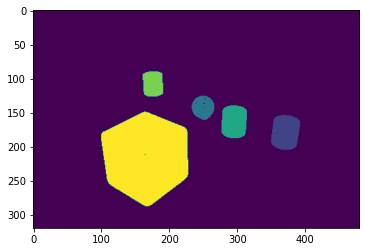

Image:  data/CLEVR_test_000214.png


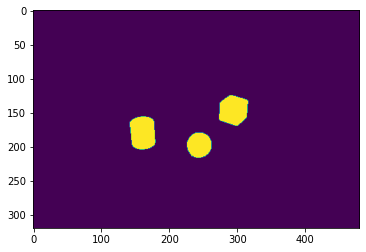

1
2
3
Počet nalezených objektů: 3


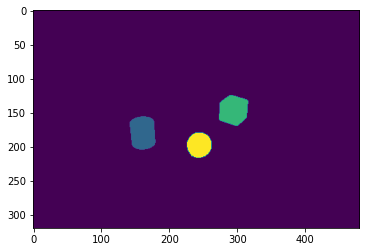

Image:  data/CLEVR_test_000377.png


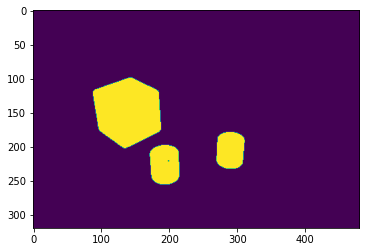

1
2
3
Počet nalezených objektů: 3


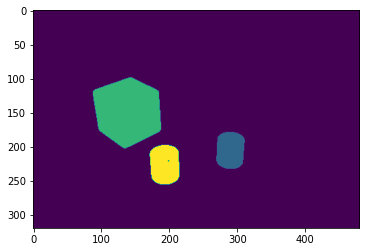

Image:  data/CLEVR_test_000388.png


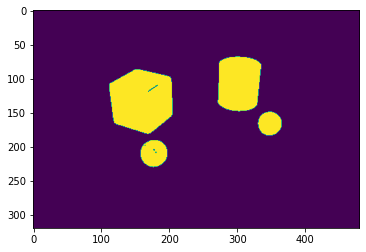

1
2
3
4
Počet nalezených objektů: 4


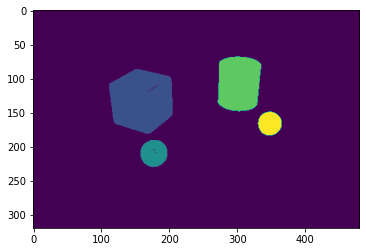

Image:  data/CLEVR_test_000389.png


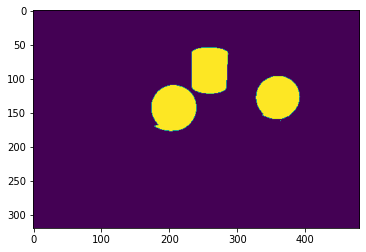

1
3
4
Počet nalezených objektů: 3


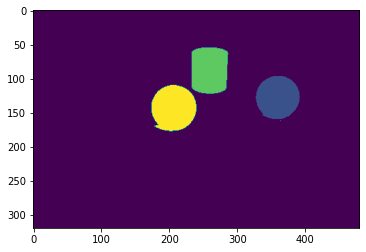

Image:  data/CLEVR_test_000411.png


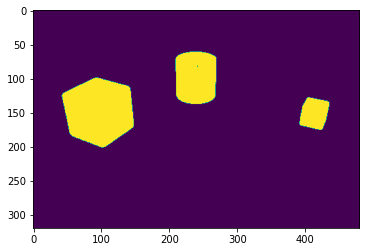

1
2
3
Počet nalezených objektů: 3


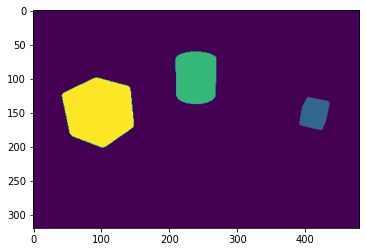

Image:  data/CLEVR_test_000439.png


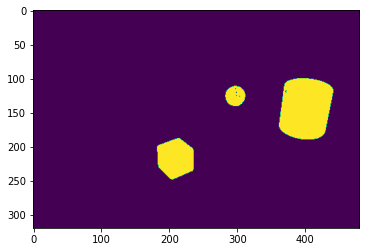

1
2
3
Počet nalezených objektů: 3


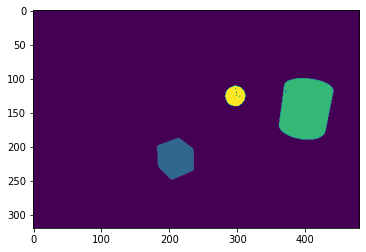

Image:  data/CLEVR_test_000558.png


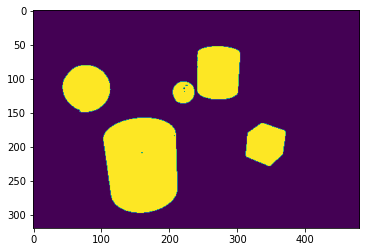

1
2
3
4
5
Počet nalezených objektů: 5


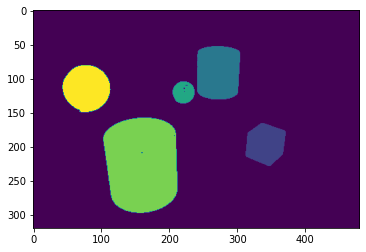

Image:  data/CLEVR_test_000559.png


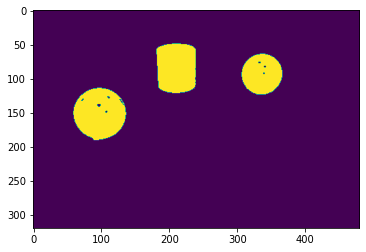

1
2
3
Počet nalezených objektů: 3


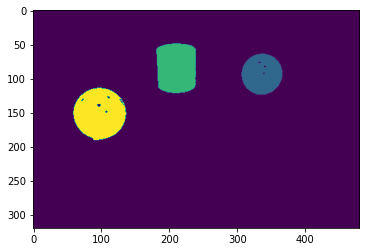

Image:  data/CLEVR_test_000565.png


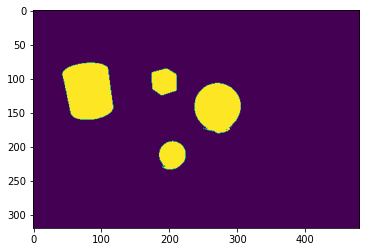

1
2
4
5
Počet nalezených objektů: 4


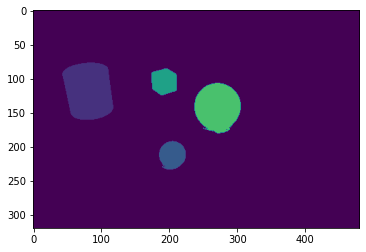

Image:  data/CLEVR_test_000606.png


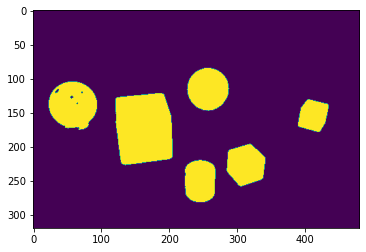

1
2
3
4
5
6
Počet nalezených objektů: 6


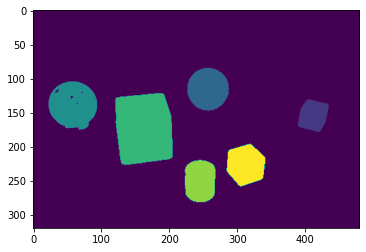

Image:  data/CLEVR_test_000758.png


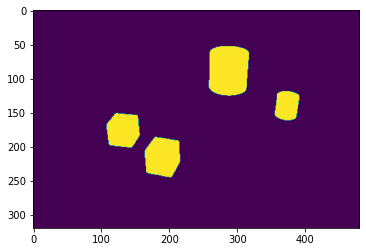

1
2
3
4
Počet nalezených objektů: 4


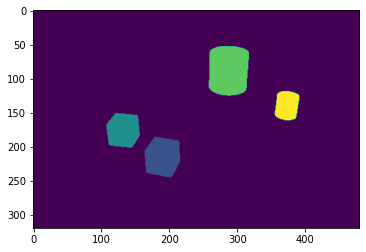

Image:  data/CLEVR_test_000766.png


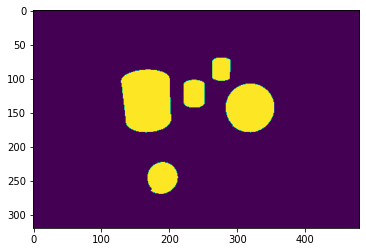

1
2
3
4
5
Počet nalezených objektů: 5


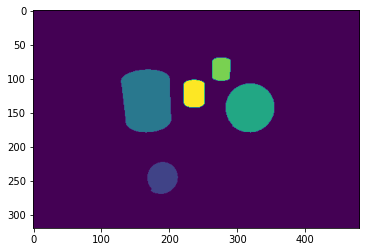

Image:  data/CLEVR_test_000770.png


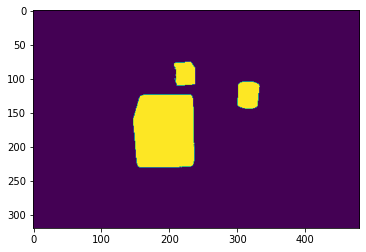

1
2
3
Počet nalezených objektů: 3


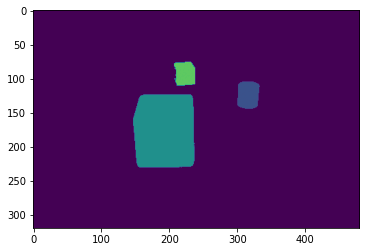

Image:  data/CLEVR_test_000821.png


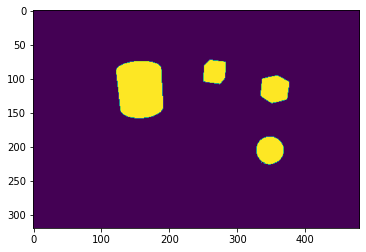

1
2
3
4
Počet nalezených objektů: 4


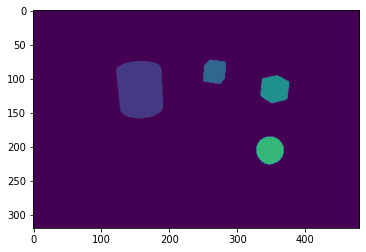

Image:  data/CLEVR_test_000835.png


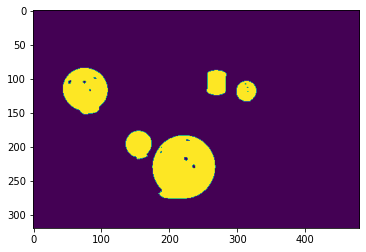

1
2
3
4
5
Počet nalezených objektů: 5


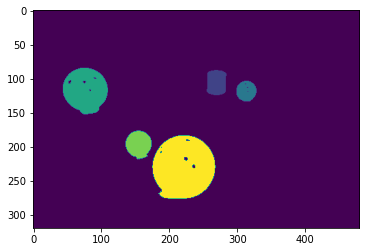

Image:  data/CLEVR_test_000837.png


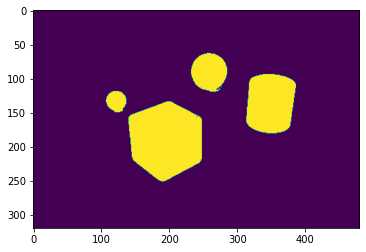

1
2
3
4
Počet nalezených objektů: 4


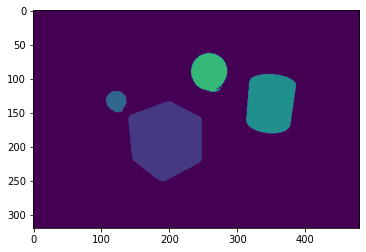

Image:  data/CLEVR_test_000941.png


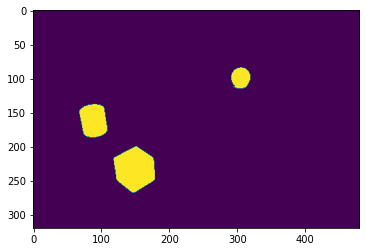

1
3
4
Počet nalezených objektů: 3


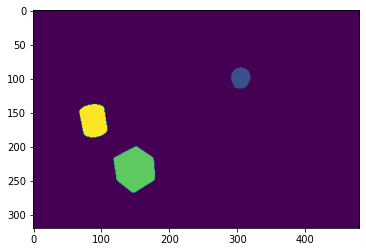

Image:  data/CLEVR_test_000955.png


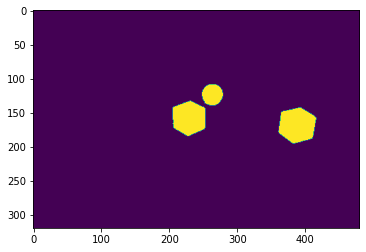

1
2
3
Počet nalezených objektů: 3


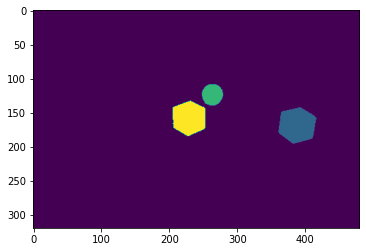

Image:  data/CLEVR_test_000994.png


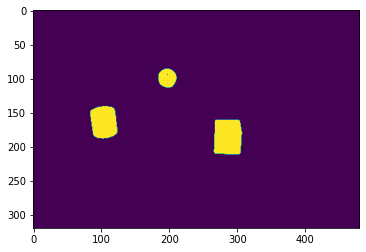

1
2
3
Počet nalezených objektů: 3


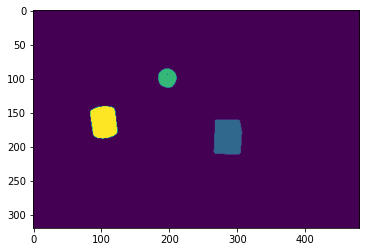

Image:  data/CLEVR_test_000997.png


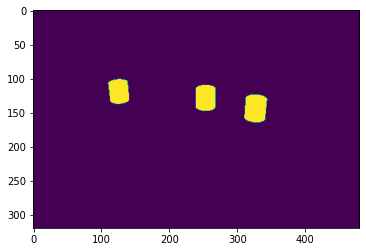

1
2
3
Počet nalezených objektů: 3


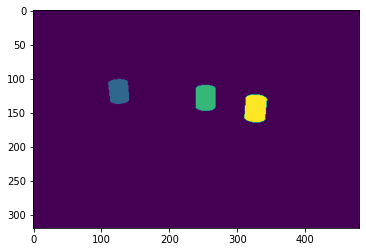

Image:  data/CLEVR_test_001109.png


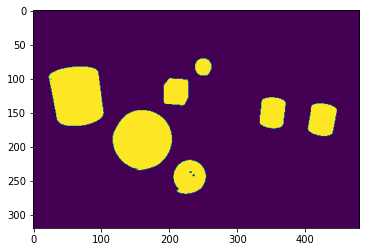

1
2
3
4
5
6
7
Počet nalezených objektů: 7


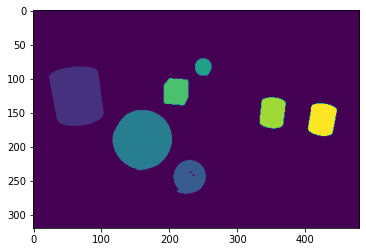

Image:  data/CLEVR_test_001256.png


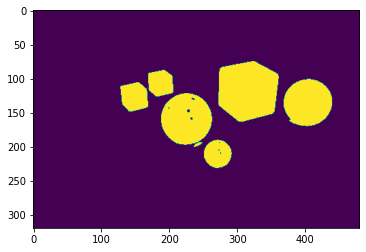

1
2
4
5
6
7
Počet nalezených objektů: 6


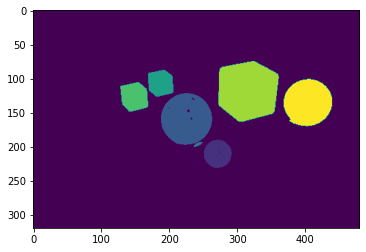

Image:  data/CLEVR_test_001294.png


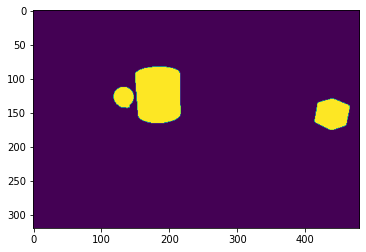

1
2
3
Počet nalezených objektů: 3


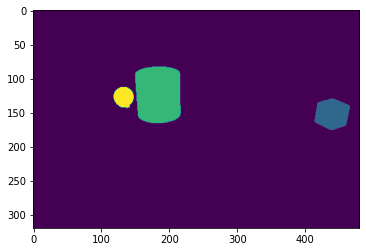

Image:  data/CLEVR_test_001525.png


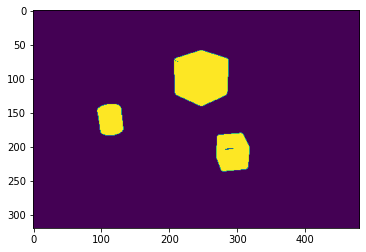

1
2
3
Počet nalezených objektů: 3


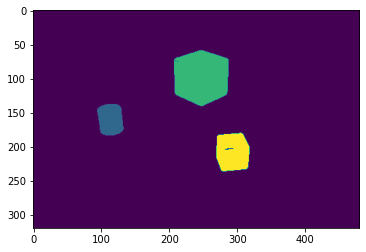

Image:  data/CLEVR_test_001530.png


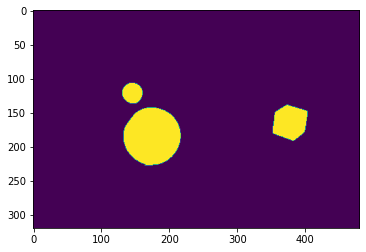

1
2
3
Počet nalezených objektů: 3


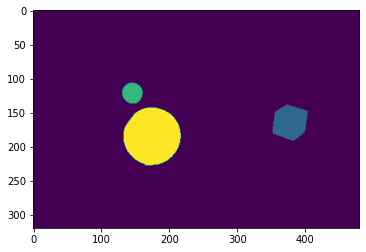

Image:  data/CLEVR_test_001652.png


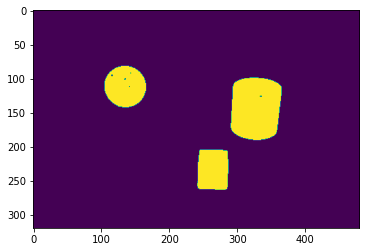

1
2
3
Počet nalezených objektů: 3


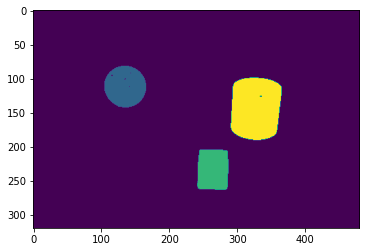

Image:  data/CLEVR_test_001685.png


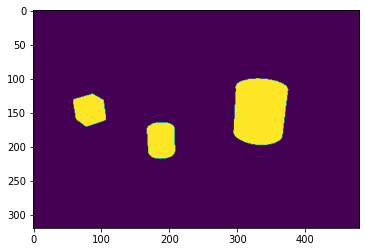

1
2
3
Počet nalezených objektů: 3


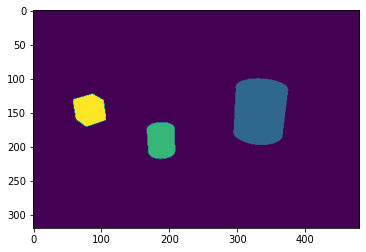

Image:  data/CLEVR_test_001687.png


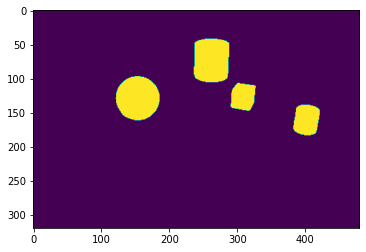

1
2
3
4
Počet nalezených objektů: 4


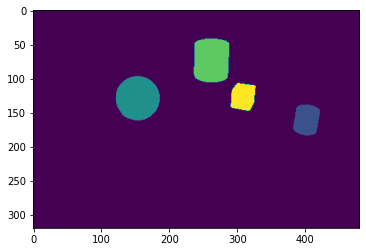

Image:  data/CLEVR_test_001690.png


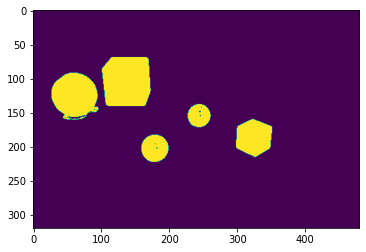

1
2
4
5
6
Počet nalezených objektů: 5


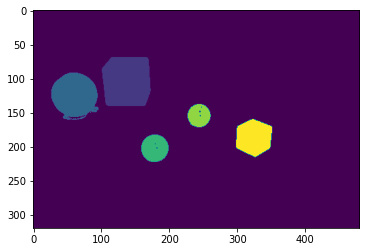

Celkově se tedy podařilo určit 30 z 30


In [29]:
# číslo 
# total_objects_matching
# bude říkat,
# na kolika obrázcích se
# povedlo určit očekávaný počet
# objektů
total_objects_matching = 0

for filename in get_paths():

    print("Image: ", filename)

    with Image.open(filename).convert('HSV') as img:
        plt.imshow(img)

    width, height = img.size

    img_data = np.array(img)
    # print(img_data.shape)

    img_data = np.reshape(img_data, (-1,3))
    # print(img_data.shape)




    # zde si dovolím zakomentovat následující kus kodu
    # a natvrdo stanovit počet clusterů rovný 2,
    # jelikož mám odzkoušeno, že díky tomu, že
    # pro každý obrázek to bude 2;
    # dané je to samozřejmě tím, že
    # se prvky rozdělí do dvou shluků:
    # slabě saturovaný shluk (pozadí) a silně saturovaný shluk (barevné objekty)
    
    #best_n_clusters = -1
    #best_score = -1.1
    #range_n_clusters = list (range(2,9))
    #for n_clusters in range_n_clusters:
        #clusterer = KMeans(n_clusters=n_clusters, random_state = 1)
        #preds = clusterer.fit_predict(img_data[:, 1:2])
        #centers = clusterer.cluster_centers_


        #score = silhouette_score(img_data, preds, sample_size=5000)

        #if (score > best_score):
        #    best_score = score
        #    best_n_clusters = n_clusters
        
        #print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    #kmeans = KMeans(n_clusters=best_n_clusters, random_state=1).fit(img_data[:, 1:2])


    # natvrdo volím 2 kvůli výše popsanému důvodu
    kmeans = KMeans(n_clusters=2, random_state=1).fit(img_data[:, 1:2])

    restored = np.take(np.uint8(kmeans.cluster_centers_), kmeans.labels_, axis=0)
    #print(restored.shape)
    #print(restored)

    cen = kmeans.cluster_centers_
    lab = kmeans.labels_

    # show the image

    plt.imshow(restored.reshape((320, 480,1)))
    plt.show()

    xx, yy = np.meshgrid(range(height), range(width), indexing='ij')
    grid = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1, 1))), axis=1)

    # z obrázků plyne, že pozadí zabírá 
    # mnohem více pixelů, než objekty
    # tedy pozadí jednoduše rozpoznáme 
    # podle toho, že ze dvou clusterů, 
    # které jsme získali díky Saturaci
    # ten cluster náležící pozadí bude ten 
    # co má větší velikost
    number_of_background_cluster = 0
    if (lab[lab == 0].size < lab[lab == 1].size):
        number_of_background_cluster = 1

    object_pixels = grid[lab != number_of_background_cluster]
    # spočteme tzv. matici propojení
    Z = linkage(object_pixels, method="single", metric="euclidean")

    
    # je zřejmé, že na obrázcích je maximálně
    # tolik objektů, kolik je maximum value ve slovníku
    # dict_img_objAmount
    # který má ve svých value
    # počty objektů jednotlivých obrázků
    max_d = max(dict_img_objAmount.values())


    # https://datascience.stackexchange.com/questions/84594/what-is-criterion-in-flcuster-of-scipy-package
    clusters = fcluster(Z, max_d, criterion="maxclust")


    # Z toho, jak vypadají obrázky plyne, že
    # se za objekt může počítat i nechtěný šum, 
    # o který si nestojíme, proto takové to šumivé objekty zkusím
    # nepočítat do počtu celkových objektů. 
    # Odfiltruji je na základě celkového počtu pixelů.
    # To vše proběhne v user-defined funkci count_objects(). 
    #
    # total_objects udává počet nalezených objektů
    total_objects = count_objects(clusters)

    # Pokud odpovídá počet nalezených objektů počtu
    # předpokládaně nalezených objektů,
    # tak zvýšíme počet celkově úspěšně
    # zanalyzovaných obrázků o jedna.
    if (total_objects == dict_img_objAmount[filename]):
        total_objects_matching += 1

    print("Počet nalezených objektů:", total_objects)
    
    result = np.zeros(height * width)
    result[lab != 0] = clusters
    plt.imshow(result.reshape(320, 480,1))
    plt.show()
print("Celkově se tedy podařilo určit", total_objects_matching, "z 30")

## K O N E C

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a97cd2c9-8581-4f63-bb06-37e673082adb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>